# Gradient Boosting

Group 6

Members (Student ID/Email): Abigail Keller (2026918, akelle30@depaul.edu), Kara Faciszewski (1976775, kfacisze@depaul.edu), Joel Fernandez (1394698, jferna26@depaul.edu), Elizabeth Kerrigan (1994142, ekerrig3@depaul.edu). Srinath V.S. (1979936 , SVANAMAM@depaul.edu)

### Results:
Paramaters  tested include learning_rate, n_estimators, and max_depth. After using grid search CV and testing various combiantions, the best combination was found to be learning_rate=0.5, max_depth=1, and n_estimators=250 with a training accuracy of 93% and testing of 91%.

When running PCA and KPCA, there was not a sginficant change in perfromance. 39 components were used which explained 95% of the variance in the data. The training and testing accuarcy were 96% adn 89% respectively. KPCA had similar results but there was no  improvement over the standard method above.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [2]:
%pwd

'/Users/Abby/Documents/DePaul_MS_DS/DePaul Spring 2021/DSC 540/Project540/DSC-540---Advanced-Machine-Learning---Final-Project-main-8'

In [3]:
# os.chdir('/Users/Abby/Documents/DePaul_MS_DS/DePaul Spring 2021/DSC 540/Project540/Final_Project_github')
# os.getcwd()

In [4]:
hr_employee = pd.read_csv( './Data/HR_Employee.csv', delimiter = ",")
Attrition = pd.read_csv( './Data/Attrition.csv', delimiter = ",")

In [5]:
X = hr_employee
# Y = Attrition.values.ravel()
Y = Attrition

In [6]:
y = Y.Attrition
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1176, 69) (1176,)
(294, 69) (294,)


In [23]:
gb = GradientBoostingClassifier()
scores = cross_val_score(gb, X_train, y_train, cv=5)
scores.mean()

0.8588460151460513

In [24]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [12]:
# training accuracy
pred = gb.predict(X_train)
print(accuracy_score(y_train, pred))

0.9532312925170068


In [13]:
# testing accuracy
pred = gb.predict(X_test)
print(accuracy_score(y_test, pred))

0.8945578231292517


In [14]:
# confusion matrix
pred = gb.predict(X_test)
gbcm = confusion_matrix(y_test, pred)
pd.DataFrame(metrics.confusion_matrix(y_test, pred))

,0,1
0,248,10
1,21,15


In [15]:
# metrics
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       258
           1       0.60      0.42      0.49        36

    accuracy                           0.89       294
   macro avg       0.76      0.69      0.72       294
weighted avg       0.88      0.89      0.89       294



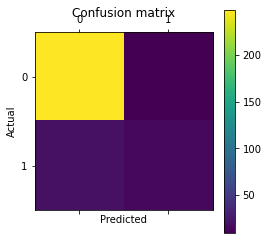

In [16]:
import pylab as plt
%matplotlib inline
plt.matshow(gbcm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [17]:
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1, 10, 100]
scores_params = []
for m in learning_rate:
    gb = GradientBoostingClassifier(learning_rate=m)
    scores = cross_val_score(gb, X=X_train, y=y_train, scoring='accuracy', cv=5)
#     print(scores)
    scores_params.append(scores.mean())

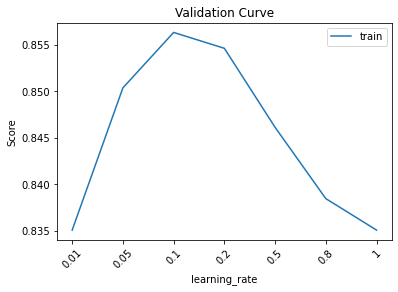

In [18]:
plt.plot(scores_params, label = 'train')
# plt.plot(scores_val, label = 'val')
plt.xticks(np.arange(len(learning_rate)), learning_rate, rotation=45)
plt.xlabel('learning_rate')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()

In [19]:
n_estimators = [50, 75, 100, 150, 200, 250, 300, 500]

In [20]:
scores_params = []
for m in n_estimators:
    gb = GradientBoostingClassifier(n_estimators=m)
    scores = cross_val_score(gb, X=X_train, y=y_train, scoring='accuracy', cv=5)
#     print(scores)
    scores_params.append(scores.mean())

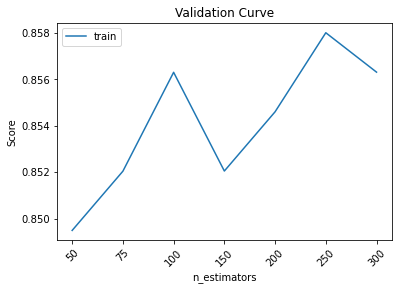

In [21]:
plt.plot(scores_params, label = 'train')
# plt.plot(scores_val, label = 'val')
plt.xticks(np.arange(len(n_estimators)), n_estimators, rotation=45)
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()

In [22]:
gb = GradientBoostingClassifier(learning_rate=0.2)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2)

In [23]:
# training accuracy
pred = gb.predict(X_train)
print(accuracy_score(y_train, pred))

0.9812925170068028


In [24]:
# testing accuracy
pred = gb.predict(X_test)
print(accuracy_score(y_test, pred))

0.8979591836734694


### Grid Search

In [51]:
# grid search
params = dict(
    n_estimators = [25, 50, 75, 100, 150, 200, 250, 300, 500],
    max_depth = [1, 3, 5, 7, 9],
    learning_rate = [0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1]
)
params

{'n_estimators': [25, 50, 75, 100, 150, 200, 250, 300, 500],
 'max_depth': [1, 3, 5, 7, 9],
 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1]}

In [52]:
gb = GradientBoostingClassifier()
gs = GridSearchCV(estimator=gb, param_grid=params, scoring='recall', cv=5)
gs

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [25, 50, 75, 100, 150, 200, 250, 300,
                                          500]},
             scoring='recall')

In [53]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [25, 50, 75, 100, 150, 200, 250, 300,
                                          500]},
             scoring='recall')

In [54]:
gs.best_estimator_

GradientBoostingClassifier(learning_rate=0.8, max_depth=1, n_estimators=300)

In [55]:
#learning_rate = 1 n_estimator = 150
gs.best_params_

{'learning_rate': 0.8, 'max_depth': 1, 'n_estimators': 300}

In [56]:
best_estimator = gs.best_estimator_
pred = best_estimator.predict(X_test)
metrics.accuracy_score(y_test, pred)

0.9081632653061225

In [57]:
# confusion matrix
gbcm = confusion_matrix(y_test, pred)
pd.DataFrame(metrics.confusion_matrix(y_test, pred))

,0,1
0,243,15
1,12,24


In [58]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       258
           1       0.62      0.67      0.64        36

    accuracy                           0.91       294
   macro avg       0.78      0.80      0.79       294
weighted avg       0.91      0.91      0.91       294



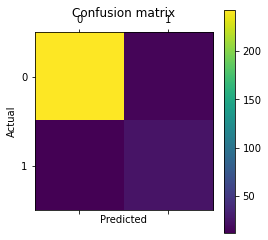

In [59]:
import pylab as plt
%matplotlib inline
plt.matshow(gbcm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

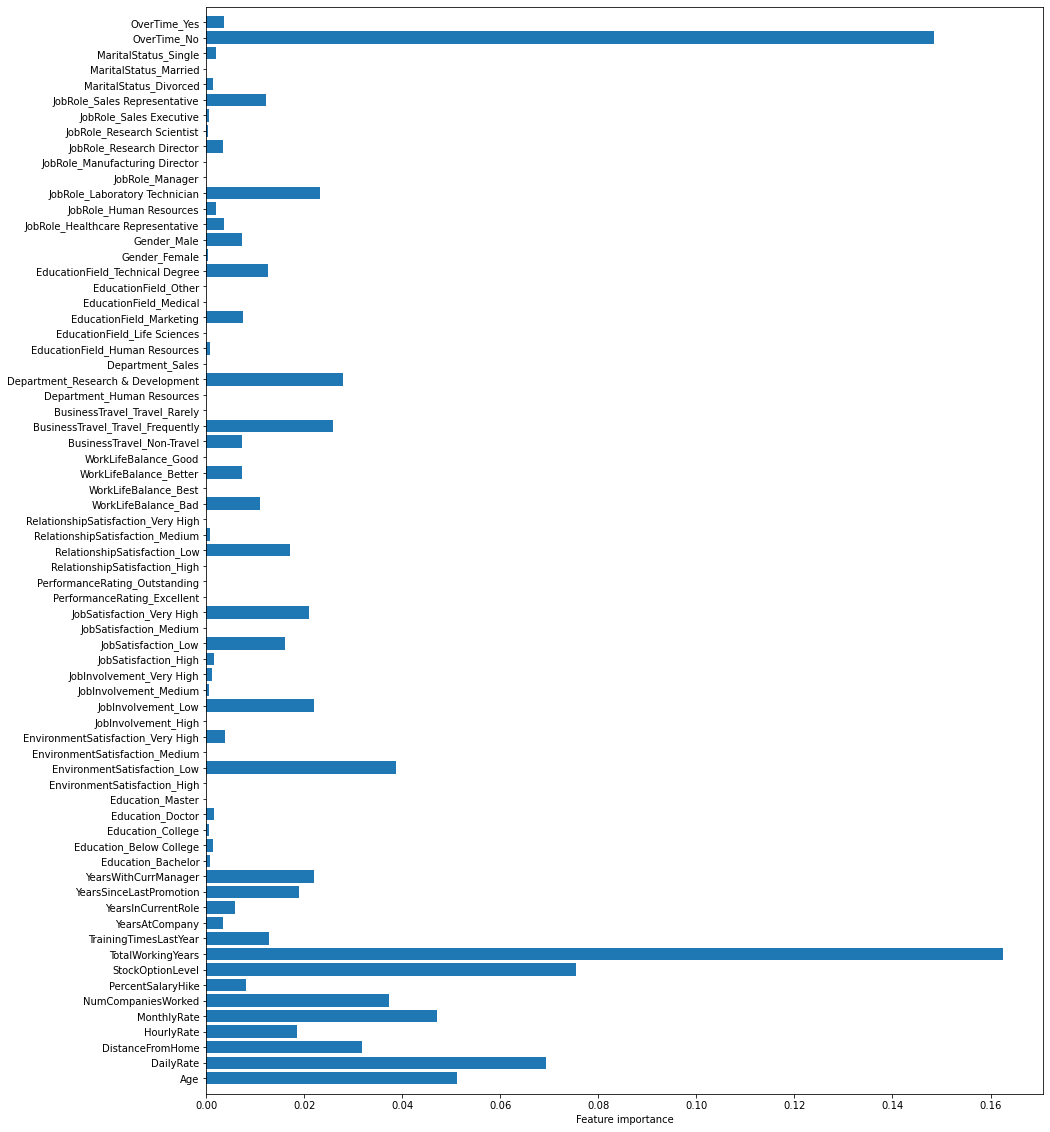

In [60]:
def plot_feature_importances(model, df):
    n_features = df.shape[1]
    df_colnames= df.columns
    fig = plt.figure(figsize = (15,20))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(best_estimator, df=X_train)

In [36]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [39]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [75, 100, 150, 200, 250],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.1, 0.2, 0.5]
}

cv = GridSearchCV(gb, parameters, cv=5, scoring='recall')
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 250}

0.094 (+/-0.035) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 75}
0.144 (+/-0.096) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}
0.204 (+/-0.085) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 150}
0.234 (+/-0.099) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 200}
0.269 (+/-0.084) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 250}
0.259 (+/-0.101) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 75}
0.289 (+/-0.12) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.289 (+/-0.081) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
0.308 (+/-0.059) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
0.333 (+/-0.067) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}
0.279 (+/-0.132) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 75}
0.279 (+/-0.125) for {'learning_rate': 

In [ ]:
# gb = GradientBoostingClassifier()
# parameters = {
#     'n_estimators': [75, 100, 150, 200, 250],
#     'max_depth': [1, 3, 5, 7, 9],
#     'learning_rate': [0.1, 0.2, 0.5]
# }

# cv = GridSearchCV(gb, parameters, cv=5, scoring='recall')
# cv.fit(X, Y.values.ravel())

# print_results(cv)

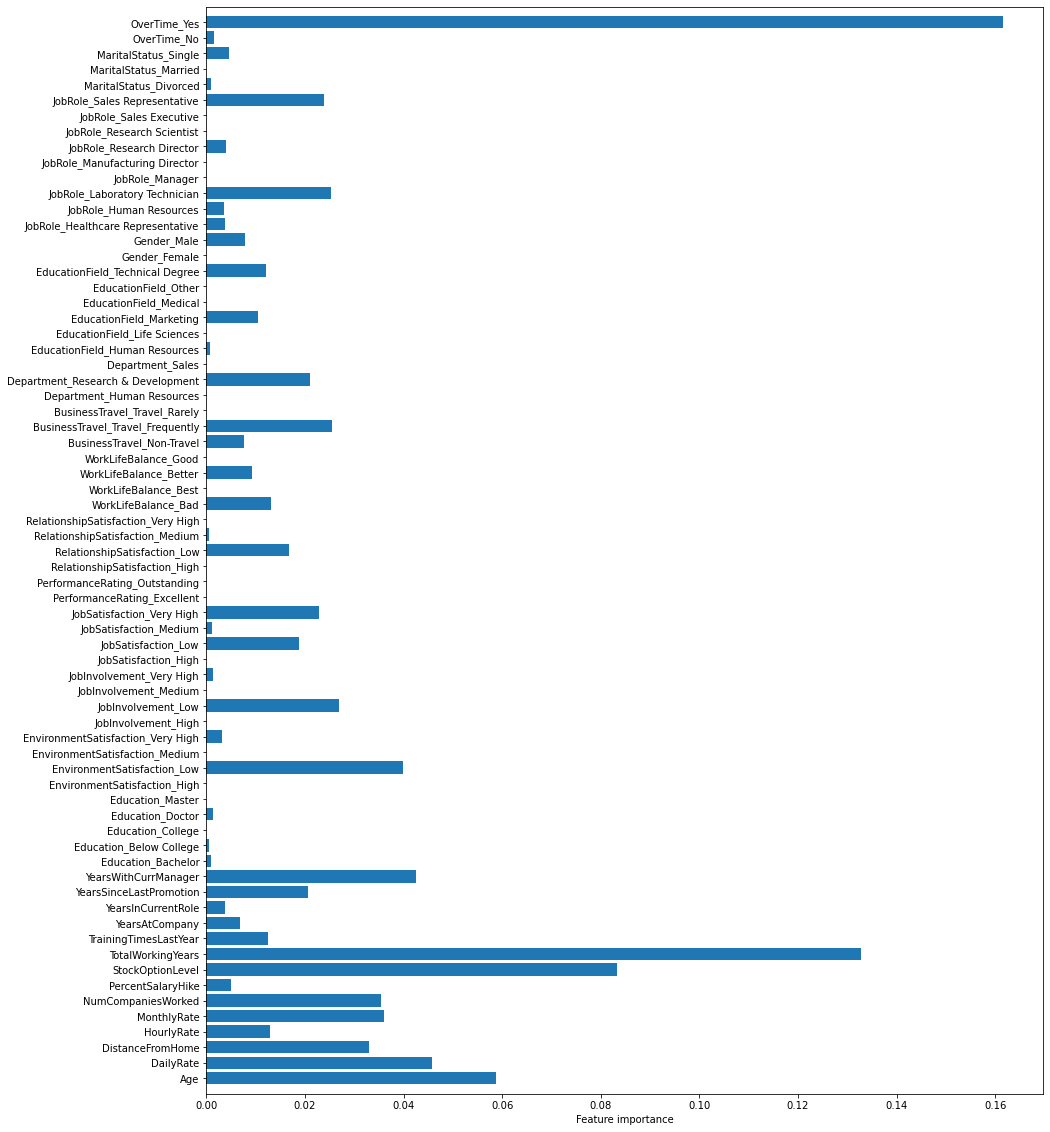

In [40]:
def plot_feature_importances(model, df):
    n_features = df.shape[1]
    df_colnames= df.columns
    fig = plt.figure(figsize = (15,20))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(cv.best_estimator_, df=X_train)

In [31]:
#0.735 (+/-0.207) for {'learning_rate': 100, 'max_depth': 5, 'n_estimators': 5}
#{'learning_rate': 1, 'max_depth': 3, 'n_estimators': 500}
gboost = GradientBoostingClassifier(learning_rate=0.5, n_estimators= 250, max_depth=1)
scores = cross_val_score(gboost, X_train, y_train, cv=5)
scores.mean()

0.864792643346556

In [32]:
gboost = GradientBoostingClassifier(learning_rate=0.8, max_depth=1, n_estimators=300)
scores = cross_val_score(gboost, X_train, y_train, cv=5)
scores.mean()

0.8571294626758024

In [33]:
#{'learning_rate': 1, 'max_depth': 1, 'n_estimators': 100}
gboost = GradientBoostingClassifier(learning_rate=0.2, n_estimators= 200, max_depth=1)
scores = cross_val_score(gboost, X_train, y_train, cv=5)
scores.mean()

0.8741579516768843

In [28]:
gb = GradientBoostingClassifier(learning_rate=0.5, n_estimators=250, max_depth=1)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=1, n_estimators=250)

In [29]:
# training accuracy
pred = gb.predict(X_train)
print(accuracy_score(y_train, pred))

0.9251700680272109


In [30]:
# testing accuracy
pred = gb.predict(X_test)
print(accuracy_score(y_test, pred))

0.9115646258503401


In [97]:
# confusion matrix
pred = gb.predict(X_test)
gbcm = confusion_matrix(y_test, pred)
pd.DataFrame(metrics.confusion_matrix(y_test, pred))

,0,1
0,246,12
1,15,21


In [98]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       258
           1       0.64      0.58      0.61        36

    accuracy                           0.91       294
   macro avg       0.79      0.77      0.78       294
weighted avg       0.91      0.91      0.91       294



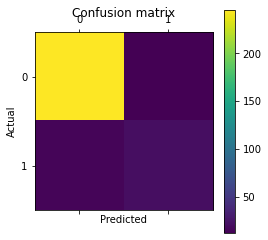

In [99]:
import pylab as plt
%matplotlib inline
plt.matshow(gbcm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [100]:
tn, fp, fn, tp = metrics.confusion_matrix(y_true = y_test, y_pred = pred).ravel()
recall = tp/(tp+fn)
precision = tp/(tp+fp)
f1 = 2 * (recall * precision)/(recall + precision)
specificity = tn/(tn+fp)
balanced_accuracy = (specificity + recall)/2
print(" Recall:",recall.round(2),"\n","Precision:",precision.round(2),"\n","Specificity:",specificity.round(2),"\n","F1-score:",f1.round(2),"\n","Balanced Accuracy:", balanced_accuracy.round(2))

 Recall: 0.58 
 Precision: 0.64 
 Specificity: 0.95 
 F1-score: 0.61 
 Balanced Accuracy: 0.77


In [199]:
from sklearn.metrics import confusion_matrix
# Function:    confusionMatrix
# Input:       Training/Testing dataframe and predictions
# Output:      Prints Formatted Confusion Matrix
# Returns:     Confusion Matrix Array
# URL:         https://towardsdatascience.com/evaluating-machine-learning-classification-problems-in-python-5-1-metrics-that-matter-792c6faddf5
def confusionMatrix(true, pred):
    cm = confusion_matrix(true, pred.round(), normalize=None)

    # Assigning columns names
    cm_df = pd.DataFrame(cm,
                        columns = ['Predicted Negative', 'Predicted Positive'],
                        index = ['Actual Negative', 'Actual Positive'])

    # Printing Formatted Confusion Matrix
    print('\n',cm_df)

    return cm

In [200]:
# Function:    heatMap
# Input:       true y values, predicted y values
# Output:      Heat Map Of Confusion Matrix
def heatMap(y_true, y_pred):
    cm_plot =  pd.crosstab(index=y_true.values.ravel(), columns=y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(cm_plot, annot=True, square=False, fmt='', cbar=False)
    plt.title("Confusion Matrix", fontsize = 15)
    plt.show()

In [201]:
# Print Confusion Matrix
cm = confusionMatrix(y_test, pred)


                  Predicted Negative  Predicted Positive
Actual Negative                 247                   9
Actual Positive                  17                  21


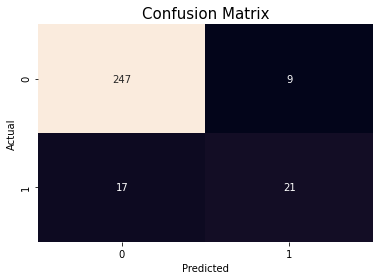

In [202]:
# Heat Map
heatMap(y_test, pred)

### PCA

In [131]:
from sklearn.decomposition import PCA

In [132]:
pca = PCA(n_components=39)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [103]:
gb = GradientBoostingClassifier()
gb.fit(X_train_pca, y_train)

GradientBoostingClassifier()

In [104]:
#training accuracy
pred = gb.predict(X_train_pca)
metrics.accuracy_score(y_train, pred)

0.9583333333333334

In [105]:
#testing accuracy
pred = gb.predict(X_test_pca)
metrics.accuracy_score(y_test, pred)

0.8979591836734694

In [133]:
# grid search
params = dict(
    n_estimators = [75, 100, 150, 200, 250],
    max_depth = [1, 3, 5, 7, 9],
    learning_rate = [0.1, 0.2, 0.5]
)
params

{'n_estimators': [75, 100, 150, 200, 250],
 'max_depth': [1, 3, 5, 7, 9],
 'learning_rate': [0.1, 0.2, 0.5]}

In [134]:
gb = GradientBoostingClassifier()
gs = GridSearchCV(estimator=gb, param_grid=params, scoring='recall', cv=5)
gs

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.5],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [75, 100, 150, 200, 250]},
             scoring='recall')

In [135]:
gs.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.5],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [75, 100, 150, 200, 250]},
             scoring='recall')

In [109]:
gs.best_estimator_

GradientBoostingClassifier(learning_rate=0.5, max_depth=1, n_estimators=250)

In [110]:
gs.best_params_

{'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 250}

In [71]:
gb = GradientBoostingClassifier(learning_rate=0.5, n_estimators=250, max_depth=1)
gb.fit(X_train_pca, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=1, n_estimators=250)

In [55]:
#training accuracy
pred = gb.predict(X_train_pca)
metrics.accuracy_score(y_train, pred)

0.9591836734693877

In [56]:
#testing accuracy
pred = gb.predict(X_test_pca)
metrics.accuracy_score(y_test, pred)

0.891156462585034

In [57]:
# confusion matrix
gbcm = confusion_matrix(y_test, pred)
pd.DataFrame(metrics.confusion_matrix(y_test, pred))

,0,1
0,243,8
1,24,19


In [58]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       251
           1       0.70      0.44      0.54        43

    accuracy                           0.89       294
   macro avg       0.81      0.70      0.74       294
weighted avg       0.88      0.89      0.88       294



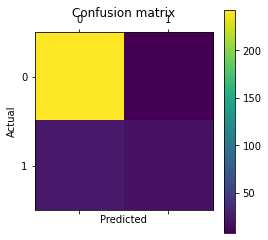

In [59]:
import pylab as plt
%matplotlib inline
plt.matshow(gbcm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [60]:
tn, fp, fn, tp = metrics.confusion_matrix(y_true = y_test, y_pred = pred).ravel()
recall = tp/(tp+fn)
precision = tp/(tp+fp)
f1 = 2 * (recall * precision)/(recall + precision)
specificity = tn/(tn+fp)
balanced_accuracy = (specificity + recall)/2
print(" Recall:",recall.round(2),"\n","Precision:",precision.round(2),"\n","Specificity:",specificity.round(2),"\n","F1-score:",f1.round(2),"\n","Balanced Accuracy:", balanced_accuracy.round(2))

 Recall: 0.44 
 Precision: 0.7 
 Specificity: 0.97 
 F1-score: 0.54 
 Balanced Accuracy: 0.7


### KPCA

In [34]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

In [97]:
kpca = KernelPCA(n_components=50, kernel='rbf', n_jobs=-1, remove_zero_eig=True)
kpca.fit(X_train)
X_train_kpca = kpca.transform(X_train)
X_test_kpca = kpca.transform(X_test)

In [98]:
gb = GradientBoostingClassifier()
gb.fit(X_train_kpca, y_train)

GradientBoostingClassifier()

In [99]:
#training accuracy
pred = gb.predict(X_train_kpca)
metrics.accuracy_score(y_train, pred)

0.9710884353741497

In [100]:
#testing accuracy
pred = gb.predict(X_test_kpca)
metrics.accuracy_score(y_test, pred)

0.8707482993197279

In [101]:
# grid search
params = dict(
    n_estimators = [75, 100, 150, 200, 250],
    max_depth = [1, 3, 5, 7, 9],
    learning_rate = [0.1, 0.2, 0.5]
)
params

{'n_estimators': [75, 100, 150, 200, 250],
 'max_depth': [1, 3, 5, 7, 9],
 'learning_rate': [0.1, 0.2, 0.5]}

In [102]:
gb = GradientBoostingClassifier()
gs = GridSearchCV(estimator=gb, param_grid=params, scoring='recall', cv=5)
gs

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.5],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [75, 100, 150, 200, 250]},
             scoring='recall')

In [103]:
gs.fit(X_train_kpca, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.5],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [75, 100, 150, 200, 250]},
             scoring='recall')

In [104]:
gs.best_estimator_

GradientBoostingClassifier(learning_rate=0.5)

In [105]:
gs.best_params_

{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 100}

In [118]:
gb = GradientBoostingClassifier(learning_rate=0.5, n_estimators=100, max_depth=1)
gb.fit(X_train_kpca, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=1)

In [119]:
#training accuracy
pred = gb.predict(X_train_kpca)
metrics.accuracy_score(y_train, pred)

0.9285714285714286

In [120]:
#testing accuracy
pred = gb.predict(X_test_kpca)
metrics.accuracy_score(y_test, pred)

0.8707482993197279

In [121]:
# confusion matrix
gbcm = confusion_matrix(y_test, pred)
pd.DataFrame(metrics.confusion_matrix(y_test, pred))

,0,1
0,243,10
1,28,13


In [122]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       253
           1       0.57      0.32      0.41        41

    accuracy                           0.87       294
   macro avg       0.73      0.64      0.67       294
weighted avg       0.85      0.87      0.85       294



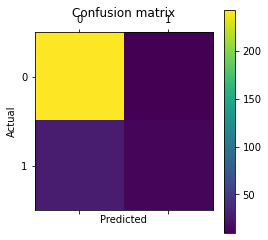

In [123]:
import pylab as plt
%matplotlib inline
plt.matshow(gbcm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [124]:
tn, fp, fn, tp = metrics.confusion_matrix(y_true = y_test, y_pred = pred).ravel()
recall = tp/(tp+fn)
precision = tp/(tp+fp)
f1 = 2 * (recall * precision)/(recall + precision)
specificity = tn/(tn+fp)
balanced_accuracy = (specificity + recall)/2
print(" Recall:",recall.round(2),"\n","Precision:",precision.round(2),"\n","Specificity:",specificity.round(2),"\n","F1-score:",f1.round(2),"\n","Balanced Accuracy:", balanced_accuracy.round(2))

 Recall: 0.32 
 Precision: 0.57 
 Specificity: 0.96 
 F1-score: 0.41 
 Balanced Accuracy: 0.64
